In [4]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
%autoreload 2

In [1]:
%env CUPY_ACCELERATORS=cub,cutensor

env: CUPY_ACCELERATORS=cub,cutensor


In [2]:
%env

{'ACSVCPORT': '17532',
 'ALLUSERSPROFILE': 'C:\\ProgramData',
 'APPDATA': 'C:\\Users\\phill\\AppData\\Roaming',
 'APPLICATION_INSIGHTS_NO_DIAGNOSTIC_CHANNEL': '1',
 'CHOCOLATEYINSTALL': 'C:\\ProgramData\\chocolatey',
 'CHOCOLATEYLASTPATHUPDATE': '132882153334096638',
 'CHROME_CRASHPAD_PIPE_NAME': '\\\\.\\pipe\\LOCAL\\crashpad_4056_XIFLZLSOBZXUWEFV',
 'CLION': 'C:\\Program Files\\JetBrains\\CLion 2021.3.3\\bin;',
 'COMMONPROGRAMFILES': 'C:\\Program Files\\Common Files',
 'COMMONPROGRAMFILES(X86)': 'C:\\Program Files (x86)\\Common Files',
 'COMMONPROGRAMW6432': 'C:\\Program Files\\Common Files',
 'COMPUTERNAME': 'JARVIS',
 'COMSPEC': 'C:\\WINDOWS\\system32\\cmd.exe',
 'CUDA_PATH': 'C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v11.7',
 'CUDA_PATH_V11_7': 'C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v11.7',
 'DRIVERDATA': 'C:\\Windows\\System32\\Drivers\\DriverData',
 'ELECTRON_RUN_AS_NODE': '1',
 'HOMEDRIVE': 'C:',
 'HOMEPATH': '\\Users\\phill',
 'INTELLIJ IDEA COMMUN

In [1]:
from nn.NeuralNet import NN
from layers.FullyConnected import FC
from layers.Flatten import Flatten
from layers.activations.relu import Relu
from layers.Convolution import Conv
from layers.BatchNormalization import BatchNorm
from layers.Pool.MaxPool import MaxPool
from layers.Dropout import Dropout
from loss_functions.softmax_with_cross_entropy import SoftmaxCrossEntropy
from optimizers.adam import Adam
from optimizers.momentum import Momentum

import pickle
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets
%matplotlib inline

In [2]:
def showRandomImage(trainingImages):
    i = np.random.randint(trainingImages.shape[0])
    plt.imshow(trainingImages[i],cmap=plt.get_cmap('gray'))

In [3]:
# Load Mnist dataset
(trainingImages, trainingLabels), (testImages, testLabels) = datasets.mnist.load_data()

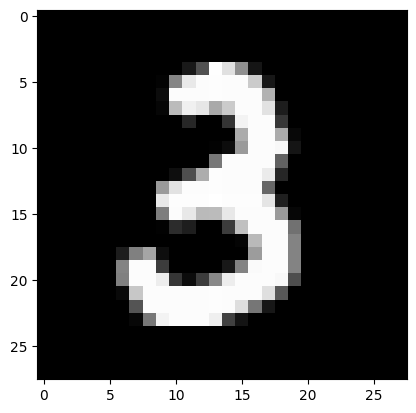

In [4]:
showRandomImage(trainingImages)

In [5]:
# Normalize Image
trainingImages =  trainingImages.astype(np.float32) / 255

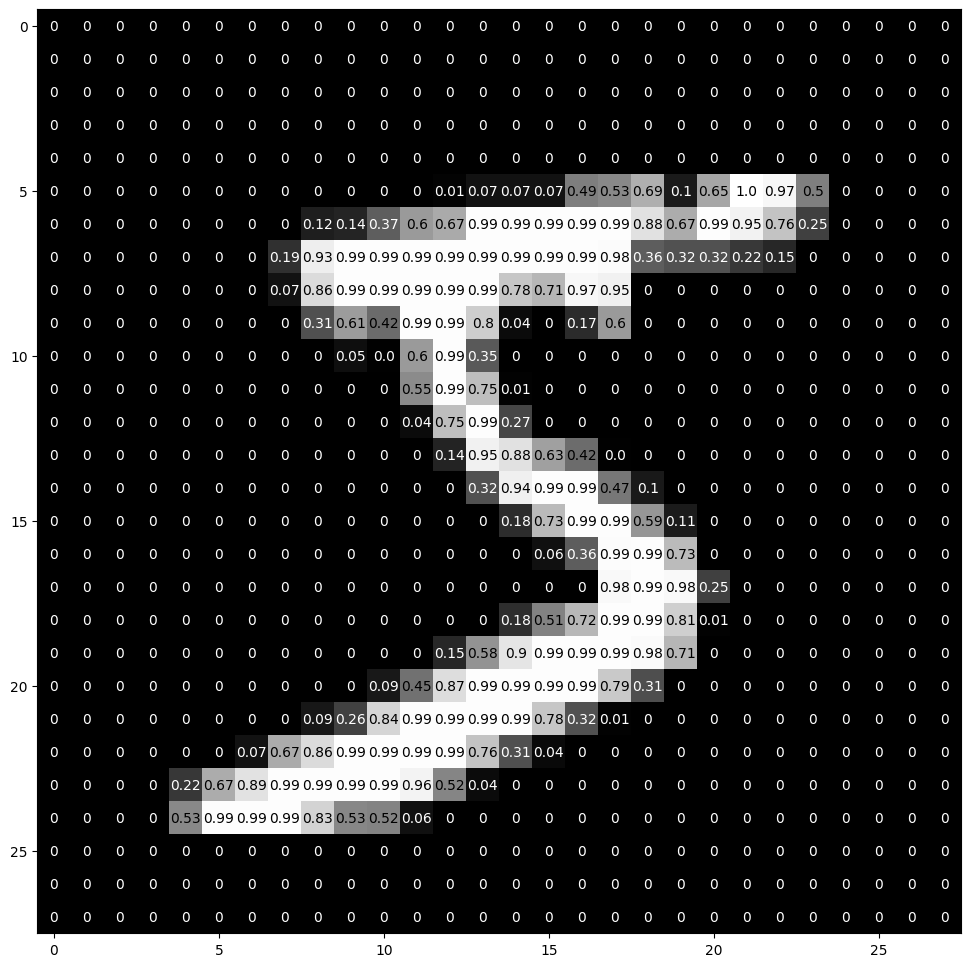

In [6]:
# View an Image in more details
img = np.squeeze(trainingImages[0])

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

In [7]:
#Create model to train network
batch_size = 128
import cupy as cp
trainingImages = cp.array(trainingImages)
trainingLabels = cp.array(trainingLabels)

layers = [
    Flatten(),
    FC(784, 500),
    Relu(),
    Dropout(0.5),
    FC(500, 100),
    Relu(),
    Dropout(0.5),
    FC(100,10)
]

model = NN(layers, SoftmaxCrossEntropy(), Adam())
model.summary()

'There are 443610 total params'

In [8]:
# Train Model
learning_rate = lambda epoch: 0.0001 if epoch > 10 else 0.001
loss, validation_loss, validation_accuracy = model.train(trainingImages, trainingLabels, 0.2, batch_size, 10, learning_rate, 1)

Validating: 100%|██████████| 94/94 [00:00<00:00, 333.83it/s, loss=0.07003576, acc=97.975]            


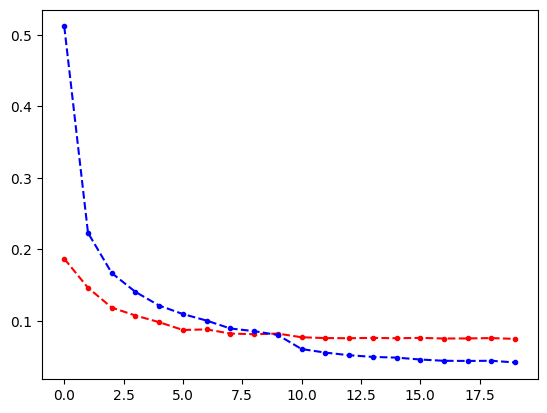

In [9]:
validation_numpy = list(map(lambda loss: cp.asnumpy(loss), validation_loss))
loss_numpy = list(map(lambda l: cp.asnumpy(l),loss))
plt.plot(validation_numpy, 'r', linestyle="--", marker=".")
plt.plot(loss_numpy, 'b', linestyle = "--", marker=".")

plt.show()

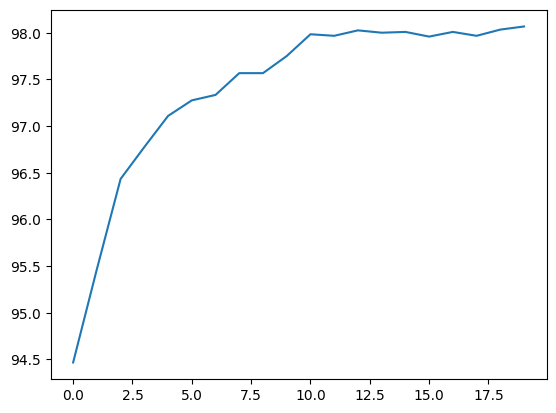

In [10]:
plt.plot(list(map(lambda acc: cp.asnumpy(acc), validation_accuracy)))

#CIFAR-10 

In [4]:
(trainingImages, trainingLabels), (testImages, testLabels) = datasets.cifar100.load_data()
trainingLabels = trainingLabels.reshape(-1)
testLabels = testLabels.reshape(-1)

In [5]:
testLabels.shape

(10000,)

In [6]:
trainingImages = trainingImages.astype(np.float32) / 255
testImages = testImages.astype(np.float32) / 255

In [7]:
trainingImages[0] = np.flip(trainingImages[0], 0)

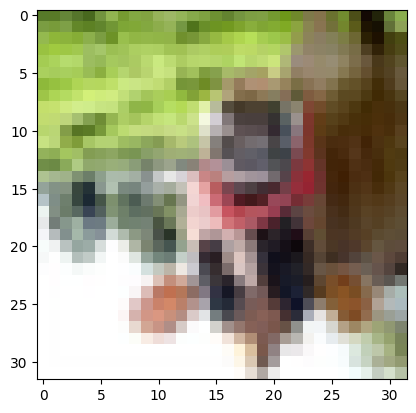

In [8]:
showRandomImage(trainingImages[:1])

In [9]:
trainingImages = (trainingImages - 0.5)/0.5
testImages = (testImages - 0.5)/0.5

In [10]:
import cupy as cp


trainingImages = cp.array(trainingImages)
trainingLabels = cp.array(trainingLabels)
testImages = cp.array(testImages)
testLabels = cp.array(testLabels)

In [11]:
# create the model
batch_size = 128

# layers = [
#     Conv(3,32,(4,4)),
#     BatchNorm(32),
#     Relu(),
#     Conv(32, 32, (3,3), stride=2),
#     BatchNorm(32),
#     Relu(),
#     Conv(32, 64, (3,3)),
#     BatchNorm(64),
#     Relu(),
#     Dropout(0.7),
#     Conv(64, 128, (4,4)),
#     BatchNorm(128),
#     Relu(),
#     Conv(128,256, (3,3), stride=2),
#     BatchNorm(256),
#     Relu(),
#     Flatten(),
#     Dropout(0.5),
#     FC(4096, 500),
#     BatchNorm(500),
#     Relu(),
#     Dropout(0.5),
#     FC(500, 100),
# ]

layers = [
    Conv(3,16,(3,3), padding=1),
    BatchNorm(16),
    Relu(),
    MaxPool(2,2),
    Conv(16, 32, (3,3), padding=1),
    BatchNorm(32),
    Relu(),
    Dropout(0.5),
    Conv(32, 64, (3,3), padding=1),
    BatchNorm(64),
    Relu(),
    MaxPool(2,2),
    Conv(64, 64, (3,3), padding=1),
    BatchNorm(64),
    Relu(),
    Conv(64,128, (3,3), padding=1),
    BatchNorm(128),
    Relu(),
    MaxPool(2,2),
    Flatten(),
    Dropout(0.5),
    FC(128*4*4, 500),
    BatchNorm(500),
    Relu(),
    Dropout(0.5),
    FC(500, 100),
]


model = NN(layers, SoftmaxCrossEntropy(), Adam())
model.summary()

'There are 1210576 total params'

In [12]:
learning_rate = lambda epoch: 0.001 if epoch < 80 else 0.0001
loss, validation_loss, validation_accuracy = model.train(trainingImages, trainingLabels, 0.2, batch_size, 10, learning_rate)

Validating:   0%|          | 0/79 [00:00<?, ?it/s]

In [15]:
# Release memory
del trainingImages, trainingLabels
cp._default_memory_pool.free_all_blocks()

: 

In [12]:
validation_accuracy

[array(2.34),
 array(2.59),
 array(2.77),
 array(2.98),
 array(3.09),
 array(3.01),
 array(3.61),
 array(3.5),
 array(3.48),
 array(3.93)]

In [13]:
model.getValidationStats(trainingImages, trainingLabels, 128)

Validating: 100%|██████████| 391/391 [00:37<00:00, 10.34it/s, loss=1.6676757, acc=4.464]             


(array(1.6676757, dtype=float32), array(4.464))

In [2]:
import torch.nn as nn
import torch
import cupy as cp

In [14]:
inp = np.array([0.1,0.2,0.6,0.7,0.9,0.4, 0.8])
(inp < 0.2) / 0.2

array([5., 0., 0., 0., 0., 0., 0.])

In [13]:
def printThis(x: str):
  print(x)

printThis(34)


34


In [13]:
test = cp.random.rand(10,) < 0.5

In [14]:
test.device

<CUDA Device 0>

In [34]:
np.max(label)

99

In [10]:
a = cp.array([2,3,4])
all = cp.sum(a) / 2
all.astype(cp.float32)

array(4.5, dtype=float32)

In [19]:
pool = nn.MaxPool2d(2, 2)

In [ ]:
before = np.array([[[[2, 0],
   [5, 7],
   [1, 9],
   [1, 6]],

  [[1, 6],
   [8, 1],
   [5, 7],
   [3, 4]],

  [[6, 1],
   [8, 8],
   [7, 7],
   [5, 6]]]])
before.shape

In [ ]:
# x = np.transpose(before, (0,2,3,1))
x = np.random.randint(20, size=(1,2,2,3))
torch_x = torch.Tensor(np.transpose(x, (0,3,1,2)))
torch_x.requires_grad_()
cp_x = cp.array(x)
# print(torch_x)

In [ ]:
m = MaxPool((x.shape[1:]), 2,2)

In [ ]:
torch_ans = pool(torch_x)
torch_ans.retain_grad()
# print(torch_ans.shape)
# print(torch_ans)
print()
# final_ans = np.int32(np.transpose(torch_ans.numpy(), (0,2,3,1)))
# print(final_ans.shape)
# final_ans

In [ ]:
max_torch = m.forward_pass(cp_x).get()
print(max_torch.shape)
# max_torch

In [ ]:
cp_ans = m.backward_pass(cp.ones((1,1,1,3)))

In [ ]:
cp_ans = cp_ans.transpose(0,3,1,2)
print(cp_x.transpose(0,3,1,2))
# print(max_torch.transpose(0,3,1,2))
print(cp_ans)

In [ ]:
summation = torch.sum(torch_ans)

In [ ]:
summation.backward()

In [ ]:
print(torch_x.grad)
print(torch_x)
# torch_ans.shape

In [19]:
x = np.array([[0.003, 3, 8, 14], [0.01, 0.1, 3, 10]])
exp_x = np.exp(x)

print(exp_x)

exp_x/np.sum(exp_x, axis=1, keepdims=True)

[[1.00300450e+00 2.00855369e+01 2.98095799e+03 1.20260428e+06]
 [1.01005017e+00 1.10517092e+00 2.00855369e+01 2.20264658e+04]]


array([[8.31950264e-07, 1.66601124e-05, 2.47257991e-03, 9.97509928e-01],
       [4.58100341e-05, 5.01241613e-05, 9.10963793e-04, 9.98993102e-01]])

In [20]:
p = x - np.max(x, axis=1, keepdims=True)
exp_p = np.exp(p)

print(exp_p)

exp_p/np.sum(exp_p, axis=1, keepdims=True)

[[8.34027051e-07 1.67017008e-05 2.47875218e-03 1.00000000e+00]
 [4.58562066e-05 5.01746821e-05 9.11881966e-04 1.00000000e+00]]


array([[8.31950264e-07, 1.66601124e-05, 2.47257991e-03, 9.97509928e-01],
       [4.58100341e-05, 5.01241613e-05, 9.10963793e-04, 9.98993102e-01]])

In [11]:
a = np.random.randint(1,9, size=(4,3))

In [19]:
b = cp.asarray(a)

'cupy'

In [18]:
a

array([[7, 6, 3],
       [5, 8, 2],
       [5, 6, 2],
       [7, 4, 2]])